In [18]:
import numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
from sklearn.linear_model import LinearRegression

In [19]:
import w2_unittest

In [20]:
path = "data/tvmarketing.csv"
adv = pd.read_csv(path)

In [21]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [22]:
w2_unittest.test_load_data(adv)

 All tests passed


<Axes: xlabel='TV', ylabel='Sales'>

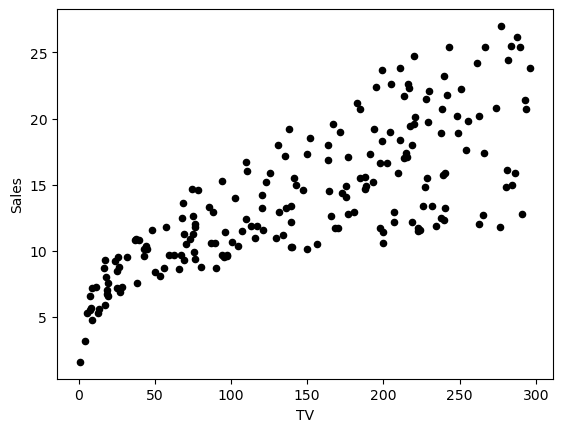

In [23]:
adv.plot(x='TV',y='Sales',c='black',kind='scatter')

In [24]:
X = adv['TV']
Y = adv['Sales']

In [25]:
m_numpy, b_numpy = np.polyfit(X,Y,1)
print(f"Slope : {m_numpy}, Intercept : {b_numpy}")

Slope : 0.04753664043301974, Intercept : 7.032593549127695


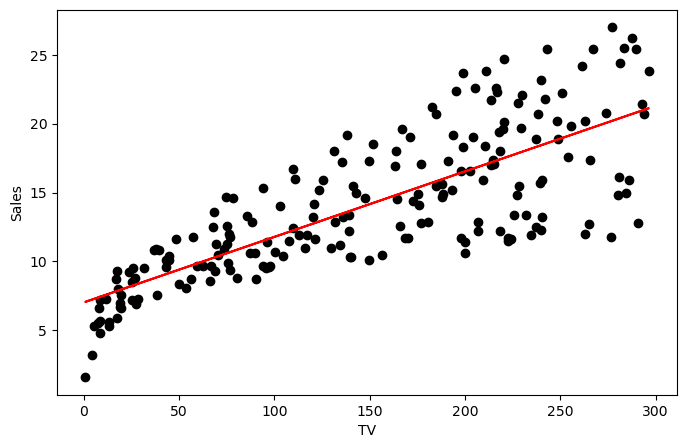

In [26]:
def plot_linear_regression(X,Y,x_label,y_label,m,b, X_pred=np.array([]), Y_pred=np.array([])):
    fig,ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(X,Y,'o',color='black')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.plot(X, m*X + b, color = 'red')
    ax.plot(X_pred,Y_pred,color='blue', markersize=8)

plot_linear_regression(X,Y,'TV','Sales',m_numpy,b_numpy)

In [27]:
def pred_numpy(m,b,X):
    Y = m*X + b
    return Y
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


In [28]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


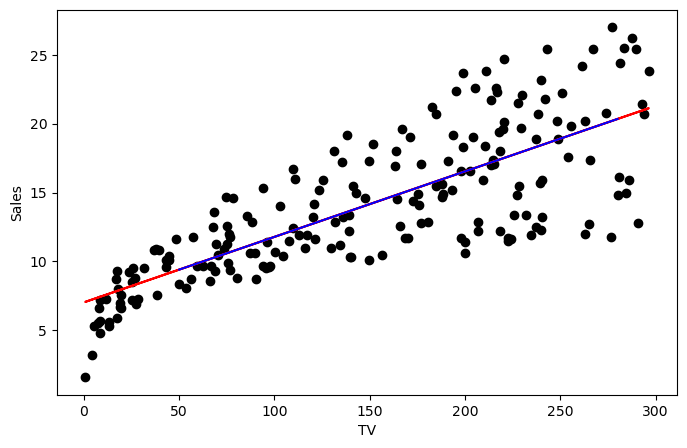

In [29]:
plot_linear_regression(X, Y, 'TV', 'Sales', m_numpy, b_numpy, X_pred, Y_pred_numpy)

In [30]:
lr_sklearn = LinearRegression()

In [36]:
X = np.array(X)
Y = np.array(Y)

In [37]:
print(X.shape)
print(Y.shape)

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

(200,)
(200,)
Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 18

In [38]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(X_sklearn.shape)
print(Y_sklearn.shape)

(200, 1)
(200, 1)


In [39]:
lr_sklearn.fit(X_sklearn,Y_sklearn)

LinearRegression()

In [40]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

In [41]:
print(f"Slope: {m_sklearn}, intercept: {b_sklearn}")

Slope: [[0.04753664]], intercept: [7.03259355]


In [42]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


In [43]:
def pred_sklearn(X,lr_sklearn):
    X_2D = X[:,np.newaxis]
    Y = lr_sklearn.predict(X_2D)

    return Y


In [44]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


In [46]:
w2_unittest.test_sklearn_predict(pred_sklearn,lr_sklearn)

 All tests passed


In [61]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [62]:
def E(m,b,X,Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)


In [63]:
def dEdm(m,b,X,Y):
    res = 1/len(X)*np.dot(m*X + b - Y,X)

    return res

def dEdb(m,b,X,Y):
    res = 1/len(X)*np.sum(m*X + b - Y)

    return res

In [64]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.217775575138394
5.000000000000001


In [65]:
w2_unittest.test_partial_derivatives(dEdm,dEdb,X_norm,Y_norm)

 All tests passed


In [66]:
def gradient_descent(dEdm,dEdb,m,b,X,Y,learning_rate=0.001,num_iterations=1000,print_cost=False):
    for iterations in range(num_iterations):
        m_new = m - learning_rate*dEdm(m,b,X,Y)
        b_new = b - learning_rate*dEdb(m,b,X,Y)

        m = m_new
        b= b_new

        if print_cost:
            print(f"cost after itration: {iterations} : {E(m,b,X,Y)}")
    
    return m,b

In [67]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.4946040826958948, -1.3668177700765188e-16)
(0.9791767513915026, 4.521910375044022)


In [68]:
w2_unittest.test_gradient_descent(gradient_descent,dEdm,dEdb,X_norm,Y_norm)

 All tests passed


In [69]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

cost after itration: 0 : 0.2062999755919659
cost after itration: 1 : 0.19455197461564455
cost after itration: 2 : 0.19408205457659172
cost after itration: 3 : 0.19406325777502959
cost after itration: 4 : 0.1940625059029671
cost after itration: 5 : 0.1940624758280846
cost after itration: 6 : 0.1940624746250893
cost after itration: 7 : 0.19406247457696948
cost after itration: 8 : 0.19406247457504472
cost after itration: 9 : 0.19406247457496772
cost after itration: 10 : 0.19406247457496462
cost after itration: 11 : 0.19406247457496453
cost after itration: 12 : 0.19406247457496448
cost after itration: 13 : 0.19406247457496448
cost after itration: 14 : 0.19406247457496448
cost after itration: 15 : 0.19406247457496448
cost after itration: 16 : 0.19406247457496448
cost after itration: 17 : 0.19406247457496448
cost after itration: 18 : 0.19406247457496448
cost after itration: 19 : 0.19406247457496448
cost after itration: 20 : 0.19406247457496448
cost after itration: 21 : 0.19406247457496448
co

In [70]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]
